**COLLECT AND LOAD THE DATASET**

In [6]:
#importing library
import pandas as pd

#Load the dataset
df = pd.read_csv("/content/final_shop_6modata.csv")

**CLEANING THE DATASET**

In [7]:
#Display the first few rows to understand the structure of the data
print("Original dataset:")
print(df.head())

Original dataset:
                                   Ad Group Month  Impressions  Clicks   CTR  \
0    Shop - 1:1 - Desk - [shop coupon code]  July        16038    6504  0.41   
1         Shop - 1:1 - Desk - [shop coupon]  July        36462   14367  0.39   
2  Shop - 1:1 - Desk - [shop discount code]  July         3635    1458  0.40   
3     Shop - 1:1 - Desk - [shop promo code]  July        26185   10418  0.40   
4          Shop - 1:1 - Desk - [shop promo]  July          808     282  0.35   

   Conversions  Conv Rate   Cost   CPC  Revenue  Sale Amount      P&L  
0         1166       0.10   6669  1.03     6402    136770.05 -267.086  
1         2188       0.09  13746  0.96    13262    283215.21 -483.951  
2          248       0.09   1606  1.10     1723     39165.46  117.136  
3         2294       0.12  13278  1.27    13042    284823.48 -235.921  
4           61       0.15    391  1.39      337      7717.77  -53.604  


In [8]:
#Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Ad Group       0
Month          0
Impressions    0
Clicks         0
CTR            0
Conversions    0
Conv Rate      0
Cost           0
CPC            0
Revenue        0
Sale Amount    0
P&L            0
dtype: int64


In [9]:
#Remove rows with missing values
df_cleaned = df.dropna()

In [10]:
#Check for duplicate rows
print("Duplicate rows:")
print(df_cleaned.duplicated().sum())

Duplicate rows:
0


In [11]:
#there are no duplicate rows
#Remove duplicate rows (if there is duplicate rows)
df_cleaned = df_cleaned.drop_duplicates()

In [12]:
# Save the cleaned dataset
df_cleaned.to_csv("cleaned_dataset.csv", index=False)
print("Cleaning process complete. Cleaned dataset saved as 'cleaned_dataset.csv'.")

Cleaning process complete. Cleaned dataset saved as 'cleaned_dataset.csv'.


**EXPLORATORY DATA ANALYSIS (EDA)**

1) Initial Exploration:

In [13]:
# Load the dataset
df = pd.read_csv("cleaned_dataset.csv")

# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ad Group     190 non-null    object 
 1   Month        190 non-null    object 
 2   Impressions  190 non-null    int64  
 3   Clicks       190 non-null    int64  
 4   CTR          190 non-null    float64
 5   Conversions  190 non-null    int64  
 6   Conv Rate    190 non-null    float64
 7   Cost         190 non-null    int64  
 8   CPC          190 non-null    float64
 9   Revenue      190 non-null    int64  
 10  Sale Amount  190 non-null    float64
 11  P&L          190 non-null    float64
dtypes: float64(5), int64(5), object(2)
memory usage: 17.9+ KB
None

Summary Statistics:
         Impressions        Clicks         CTR  Conversions   Conv Rate  \
count     190.000000    190.000000  190.000000   190.000000  190.000000   
mean    14077.363158   4865.805263    0.272105 

2) DATA VISUALIZATION:

HISTOGRAM:

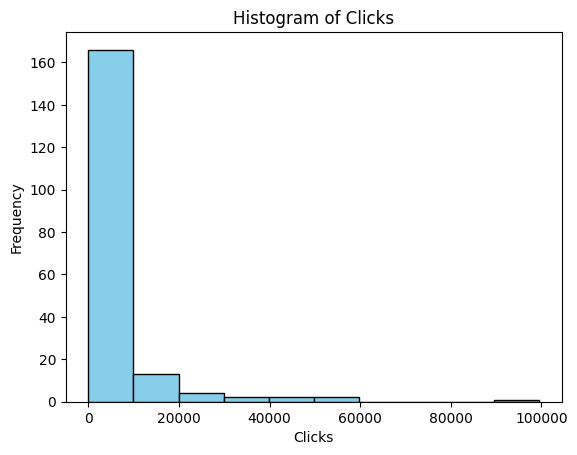

In [27]:
# Importing necessary libraries
import matplotlib.pyplot as plt

# Plotting histogram of clicks
plt.hist(df['Clicks'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Clicks')
plt.xlabel('Clicks')
plt.ylabel('Frequency')
plt.show()

BAR PLOT:

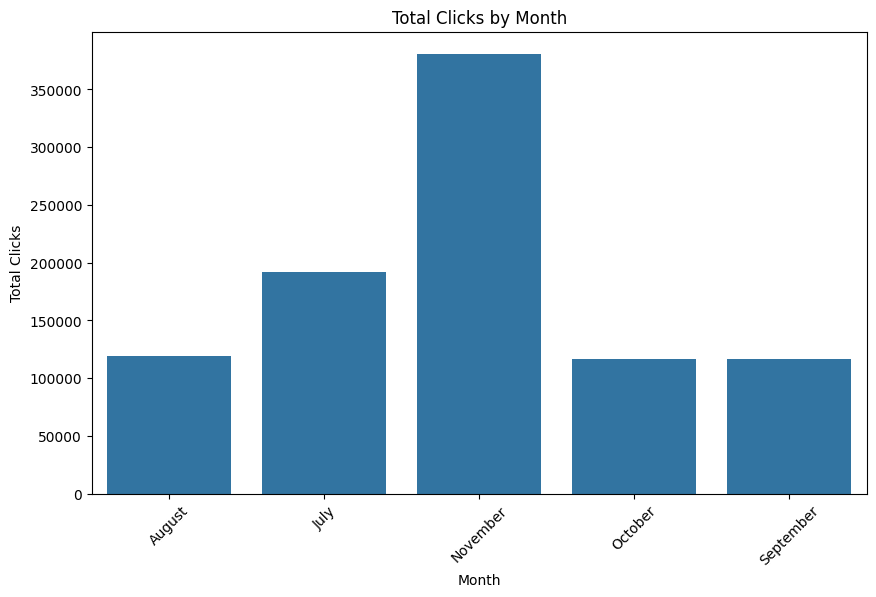

In [28]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping the data by month and summing the clicks
monthly_clicks = df.groupby('Month')['Clicks'].sum().reset_index()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Clicks', data=monthly_clicks)
plt.title('Total Clicks by Month')
plt.xlabel('Month')
plt.ylabel('Total Clicks')
plt.xticks(rotation=45)
plt.show()

Scatter Plot of Clicks vs. Cost:

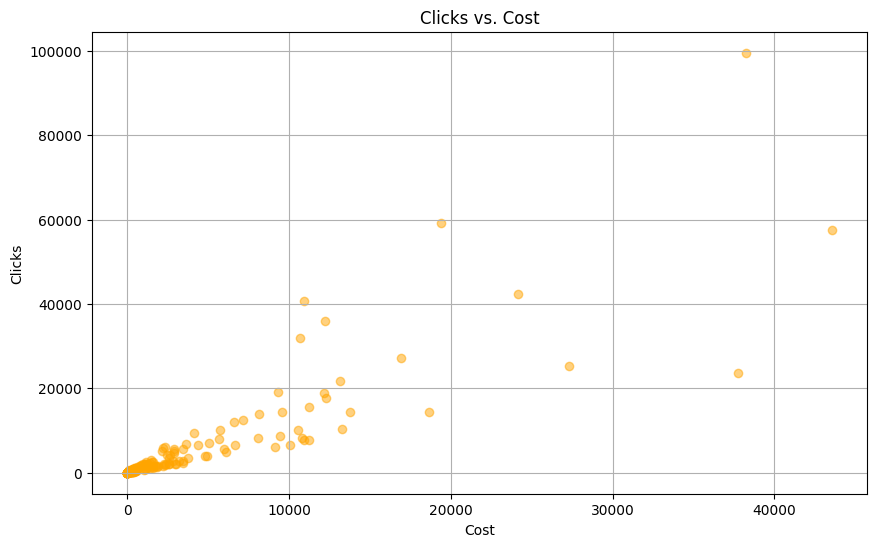

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Cost'], df['Clicks'], color='orange', alpha=0.5)
plt.title('Clicks vs. Cost')
plt.xlabel('Cost')
plt.ylabel('Clicks')
plt.grid(True)
plt.show()

Time Series Plot of Clicks Over Time:

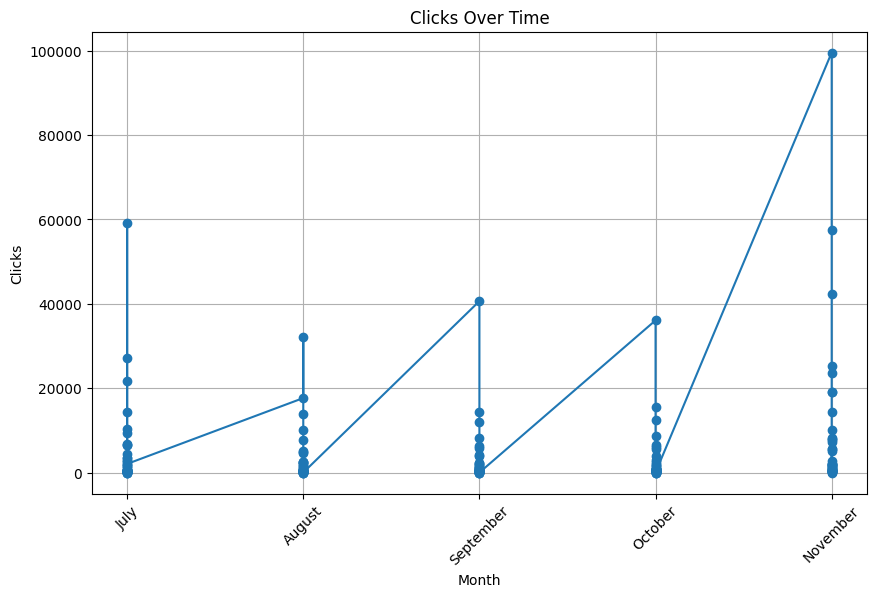

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['Clicks'], marker='o')
plt.title('Clicks Over Time')
plt.xlabel('Month')
plt.ylabel('Clicks')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()